# 6140 Final Project
## Bennett Brain & Anthony Testa
#### Visualizations
This notebook was used to produce all the graphics and charts used in the final presentation and report. All tests were conducted here, with functions.py providing supporting code for the testing procedures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


We have both version of the Iris dataset within the data folder, original and extended, but have only loaded the original here. The extended has acted as more of an inspiration for our own extended dataset, which we will construct below. Here we will also graph the original dataset, showing all features vs each other in a matrix to explore the data. This will provide some background and insights into the decisions we make later about what classes and features to focus on, and why we think certain methods worked better than other.

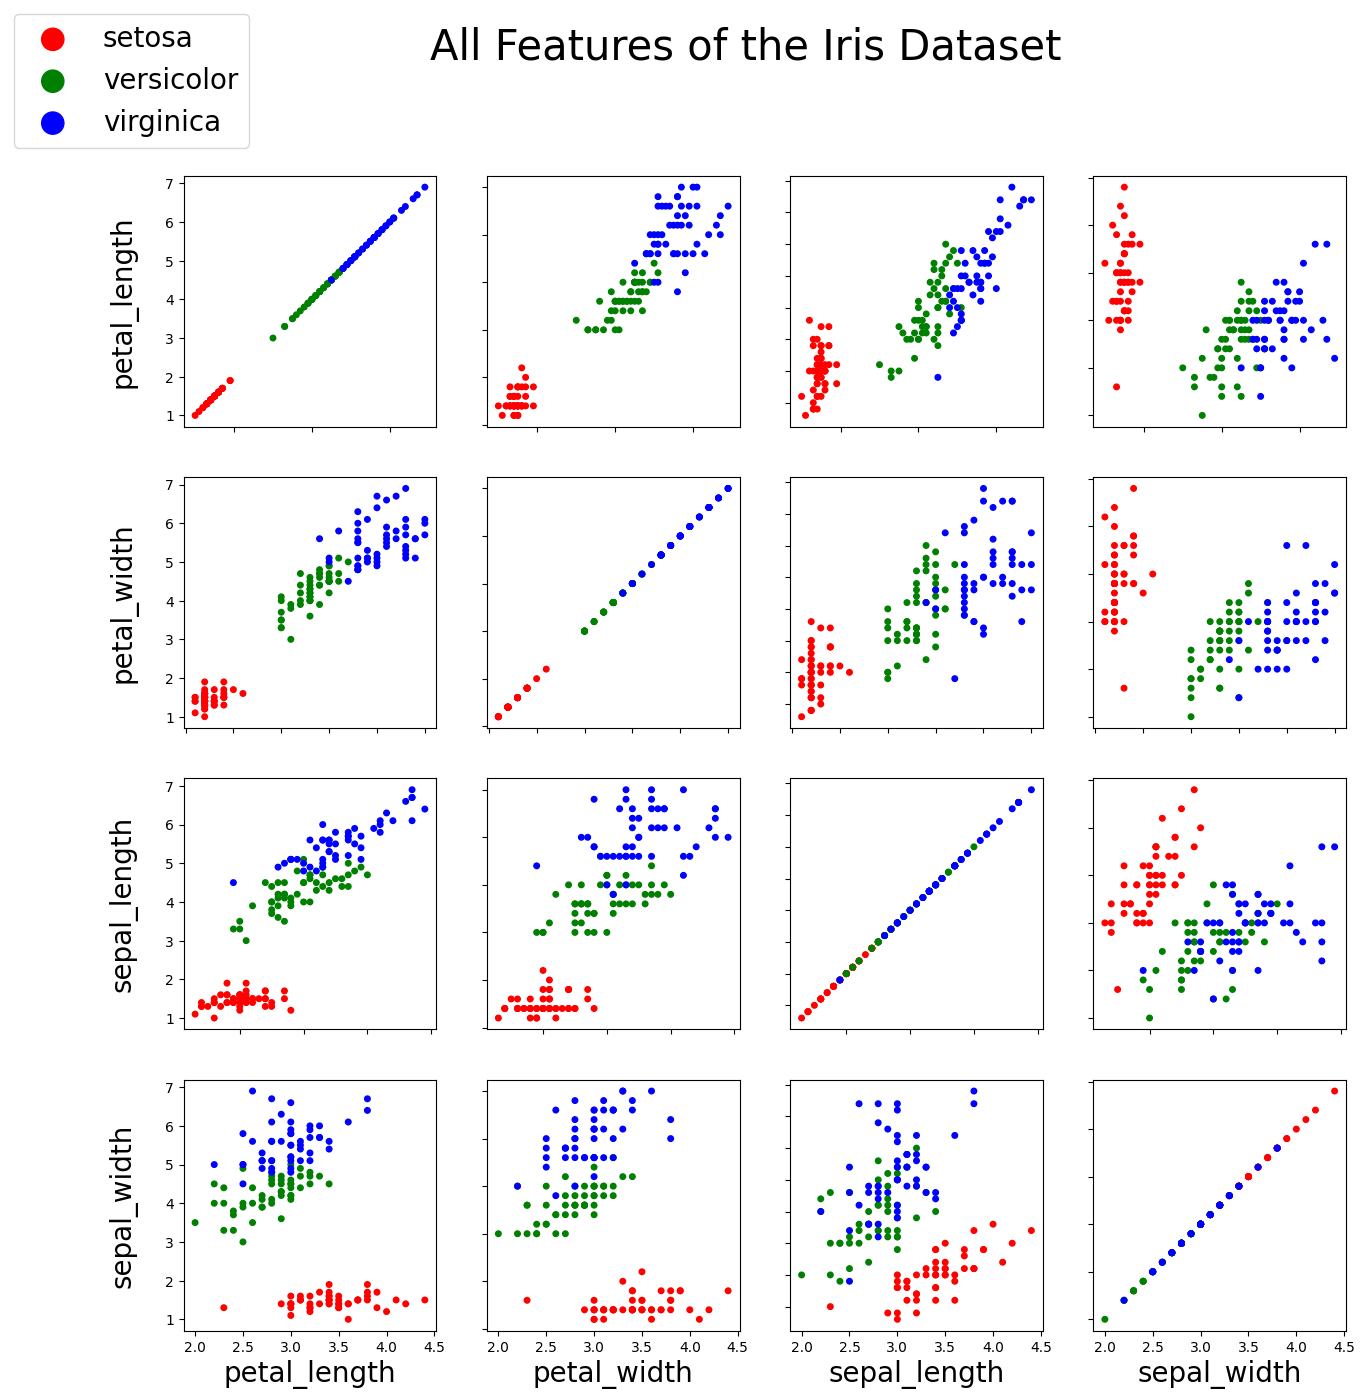

In [8]:
# Original dataset as a dataframe
iris_original = pd.read_csv('../data/iris_original.csv')

# In case we need ndarray of data
labels = iris_original['species'].to_numpy() # array of string labels
keys = iris_original.columns.values[:-1] # array of string column variable names
data = iris_original.drop('species', axis=1).to_numpy() # all data without labels (petal_length, petal_width, sepal_length, sepal_width)

# Plot data
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

values, indices, counts = np.unique(labels, return_inverse=True, return_counts=True)
colors = ['r','g','b']
for rowidx, row in enumerate(ax):
    for colidx, col in enumerate(row):
        for label, df in iris_original.groupby('species'):
            label_idx = np.where(values==label)[0][0]
            col.scatter(df.iloc[:,rowidx], df.iloc[:,colidx], c=counts[label_idx]*[colors[label_idx]], s=16, label=label)
        col.set_xlabel(iris_original.columns[colidx], fontsize=20)
        col.set_ylabel(iris_original.columns[rowidx], labelpad=20, fontsize=20)
        col.label_outer()

handles, lbls = plt.gca().get_legend_handles_labels()
fig.legend(handles, lbls, loc='upper left', fontsize=20, markerscale=4)
fig.suptitle('All Features of the Iris Dataset', fontsize=30)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, shuffle=True)

A preliminary run of the original dataset on the multi layer perceptron/neural network classifier. We will run more tests later to standardize the format, and make results more comparable.

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf.fit(x_train, y_train)
print(f'{round(clf.score(x_test, y_test), 4)*100}% accuracy on neural network')

98.33% accuracy on neural network


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Here we generate the extended dataset. The features can be seen in this table below:

| Feature                       | Variable Name      | Calculation                 |
|-------------------------------|--------------------|-----------------------------|
| Petal Area                    | petal_area         | Petal length * petal width  |
| Sepal Area                    | sepal_area         | Sepal length * sepal width  |
| Square Root of Petal Area     | sqrt_petal_area    | Square root of above        |
| Square Root of Sepal Area     | sqrt_sepal_area    | Square root of above        |
| Petal Aspect Ratio            | petal_aspect_ratio | Petal length / petal width  |
| Sepal Aspect Ratio            | sepal_aspect_ratio | Sepal length / sepal width  |
| Petal/Sepal Aspect Ratio      | ps_area_ratio      | Petal area / sepal area     |
| Petal/Sepal Length Ratio      | ps_length_ratio    | Petal length / sepal length |
| Petal/Sepal Width Ratio       | ps_width_ratio     | Petal width / sepal width   |
| Petal/Sepal Length Difference | length_difference  | Petal length – sepal length |
| Petal/Sepal Width Difference  | width_difference   | Petal width – sepal width   |
| Petal Length Squared          | petal_L2           | Petal length * petal length |
| Petal Width Squared           | petal_W2           | Petal width * petal width   |
| Sepal Length Squared          | sepal_L2           | Sepal length * sepal length |
| Sepal Width Squared           | sepal_W2           | Sepal width * sepal width   |

We also generate two subsets of this extended graph, one with ratios only, and one as the complement of this (so the whole extended dataset minus the ratios).

In [9]:
#Generating new features, adding them to dataframe (preserving original by deepcopying)

petal_area = iris_original['petal_length']*iris_original['petal_width']
sepal_area = iris_original['sepal_length']*iris_original['sepal_width']

sqrt_petal_area = np.sqrt(petal_area)
sqrt_sepal_area = np.sqrt(sepal_area)

petal_aspect_ratio = iris_original['petal_length']/iris_original['petal_width']
sepal_aspect_ratio = iris_original['sepal_length']/iris_original['sepal_width']

ps_area_ratio = petal_area/sepal_area

ps_length_ratio = iris_original['petal_length']/iris_original['sepal_length']
ps_width_ratio = iris_original['petal_width']/iris_original['sepal_width']

length_difference = iris_original['petal_length']-iris_original['sepal_length']
width_difference = iris_original['petal_width']-iris_original['sepal_width']

petal_L2 = iris_original['petal_length']*iris_original['petal_length']
petal_W2 = iris_original['petal_width']*iris_original['petal_width']
sepal_L2 = iris_original['sepal_length']*iris_original['sepal_length']
sepal_W2 = iris_original['sepal_width']*iris_original['sepal_width']

expanded_df = iris_original.copy(deep= "true")

expanded_df['petal_area'] = petal_area
expanded_df['sepal_area'] = sepal_area

expanded_df['sqrt_petal_area'] = sqrt_petal_area
expanded_df['sqrt_sepal_area'] = sqrt_sepal_area

expanded_df['petal_aspect_ratio'] = petal_aspect_ratio
expanded_df['sepal_aspect_ratio'] = sepal_aspect_ratio

expanded_df['ps_area_ratio'] = ps_area_ratio

expanded_df['ps_length_ratio'] = ps_length_ratio
expanded_df['ps_width_ratio'] = ps_width_ratio

expanded_df['length_difference'] = length_difference
expanded_df['width_difference'] = width_difference

expanded_df['petal_L2'] = petal_L2
expanded_df['petal_W2'] = petal_W2
expanded_df['sepal_L2'] = sepal_L2
expanded_df['sepal_W2'] = sepal_W2

edf_labels = expanded_df['species'].to_numpy() # array of string labels
edf_keys = expanded_df.columns.values[:-1] # array of string column variable names
edf_data = expanded_df.drop('species', axis=1).to_numpy() # all data without labels 

edf_ratios_only = expanded_df[['petal_aspect_ratio','sepal_aspect_ratio','ps_area_ratio','ps_length_ratio','ps_width_ratio','species']]
edf_2 = expanded_df[['petal_length','petal_width','sepal_length','sepal_width','sqrt_petal_area','sqrt_sepal_area','length_difference','width_difference','species']]

edf_ro_labels = edf_ratios_only['species'].to_numpy() # array of string labels
edf_ro_keys = edf_ratios_only.columns.values[:-1] # array of string column variable names
edf_ro_data = edf_ratios_only.drop('species', axis=1).to_numpy() # all data without labels 

edf_2_labels = edf_2['species'].to_numpy() # array of string labels
edf_2_keys = edf_2.columns.values[:-1] # array of string column variable names
edf_2_data = edf_2.drop('species', axis=1).to_numpy() # all data without labels 


print("whole expanded df:")
expanded_df

whole expanded df:


,petal_length,petal_width,sepal_length,sepal_width,species,petal_area,sepal_area,sqrt_petal_area,sqrt_sepal_area,petal_aspect_ratio,sepal_aspect_ratio,ps_area_ratio,ps_length_ratio,ps_width_ratio,length_difference,width_difference,petal_L2,petal_W2,sepal_L2,sepal_W2
0,1.4,0.2,5.1,3.5,setosa,0.28,17.85,0.529150,4.224926,7.000000,1.457143,0.015686,0.274510,0.057143,-3.7,-3.3,1.96,0.04,26.01,12.25
1,1.4,0.2,4.9,3.0,setosa,0.28,14.70,0.529150,3.834058,7.000000,1.633333,0.019048,0.285714,0.066667,-3.5,-2.8,1.96,0.04,24.01,9.00
2,1.3,0.2,4.7,3.2,setosa,0.26,15.04,0.509902,3.878144,6.500000,1.468750,0.017287,0.276596,0.062500,-3.4,-3.0,1.69,0.04,22.09,10.24
3,1.5,0.2,4.6,3.1,setosa,0.30,14.26,0.547723,3.776242,7.500000,1.483871,0.021038,0.326087,0.064516,-3.1,-2.9,2.25,0.04,21.16,9.61
4,1.4,0.2,5.0,3.6,setosa,0.28,18.00,0.529150,4.242641,7.000000,1.388889,0.015556,0.280000,0.055556,-3.6,-3.4,1.96,0.04,25.00,12.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica,11.96,20.10,3.458323,4.483302,2.260870,2.233333,0.595025,0.776119,0.766667,-1.5,-0.7,27.04,5.29,44.89,9.00
146,5.0,1.9,6.3,2.5,virginica,9.50,15.75,3.082207,3.968627,2.631579,2.520000,0.603175,0.793651,0.760000,-1.3,-0.6,25.00,3.61,39.69,6.25
147,5.2,2.0,6.5,3.0,virginica,10.40,19.50,3.224903,4.415880,2.600000,2.166667,0.533333,0.800000,0.666667,-1.3,-1.0,27.04,4.00,42.25,9.00
148,5.4,2.3,6.2,3.4,virginica,12.42,21.08,3.524202,4.591296,2.347826,1.823529,0.589184,0.870968,0.676471,-0.8,-1.1,29.16,5.29,38.44,11.56


In [10]:
print("subset 1:")
edf_ratios_only

subset 1:


,petal_aspect_ratio,sepal_aspect_ratio,ps_area_ratio,ps_length_ratio,ps_width_ratio,species
0,7.000000,1.457143,0.015686,0.274510,0.057143,setosa
1,7.000000,1.633333,0.019048,0.285714,0.066667,setosa
2,6.500000,1.468750,0.017287,0.276596,0.062500,setosa
3,7.500000,1.483871,0.021038,0.326087,0.064516,setosa
4,7.000000,1.388889,0.015556,0.280000,0.055556,setosa
...,...,...,...,...,...,...
145,2.260870,2.233333,0.595025,0.776119,0.766667,virginica
146,2.631579,2.520000,0.603175,0.793651,0.760000,virginica
147,2.600000,2.166667,0.533333,0.800000,0.666667,virginica
148,2.347826,1.823529,0.589184,0.870968,0.676471,virginica


In [11]:
print("subset 2:")
edf_2

subset 2:


,petal_length,petal_width,sepal_length,sepal_width,sqrt_petal_area,sqrt_sepal_area,length_difference,width_difference,species
0,1.4,0.2,5.1,3.5,0.529150,4.224926,-3.7,-3.3,setosa
1,1.4,0.2,4.9,3.0,0.529150,3.834058,-3.5,-2.8,setosa
2,1.3,0.2,4.7,3.2,0.509902,3.878144,-3.4,-3.0,setosa
3,1.5,0.2,4.6,3.1,0.547723,3.776242,-3.1,-2.9,setosa
4,1.4,0.2,5.0,3.6,0.529150,4.242641,-3.6,-3.4,setosa
...,...,...,...,...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,3.458323,4.483302,-1.5,-0.7,virginica
146,5.0,1.9,6.3,2.5,3.082207,3.968627,-1.3,-0.6,virginica
147,5.2,2.0,6.5,3.0,3.224903,4.415880,-1.3,-1.0,virginica
148,5.4,2.3,6.2,3.4,3.524202,4.591296,-0.8,-1.1,virginica


Here we are running our own principal component analysis. We import it from functions.py, and then show the results. We aren't actually reducing any dimensions yet, just apply the projection along the principal components

In [13]:
#Generating PCA data
from functions import PCA
pcaData = PCA(data)

pcaData

array([[ 2.81823932e+00, -5.64635060e+00, -6.59762347e-01,
        -3.10932338e-02],
       [ 2.78822327e+00, -5.14995237e+00, -8.42312098e-01,
         6.56716436e-02],
       [ 2.61337439e+00, -5.18200388e+00, -6.13947666e-01,
        -1.33869380e-02],
       [ 2.75702213e+00, -5.00865423e+00, -6.00288856e-01,
        -1.08930972e-01],
       [ 2.77364842e+00, -5.65370769e+00, -5.41768372e-01,
        -9.46144640e-02],
       [ 3.22150530e+00, -6.06828362e+00, -4.63169503e-01,
        -5.75571805e-02],
       [ 2.68182721e+00, -5.23749164e+00, -3.73955816e-01,
        -8.14988554e-02],
       [ 2.87621999e+00, -5.49033826e+00, -6.53727055e-01,
        -7.86533892e-02],
       [ 2.61598225e+00, -4.74864150e+00, -6.11088824e-01,
        -6.00996464e-02],
       [ 2.82960918e+00, -5.21317919e+00, -8.29480737e-01,
        -8.96503806e-02],
       [ 2.99541785e+00, -5.97202229e+00, -7.07165253e-01,
        -4.83758062e-02],
       [ 2.88960975e+00, -5.34168302e+00, -5.29697788e-01,
      

We also plot the PCA transformed data, this time with just the first two principal components. You can see how this isn't quite the same as any two of the original features, but because this transformation is linear, it really isn't all that different either.

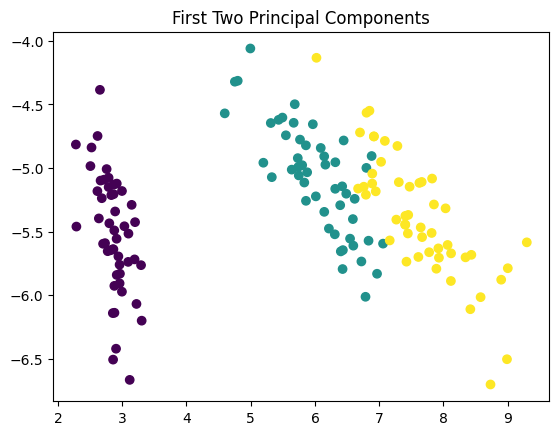

In [7]:
plt.scatter(pcaData[:,0], pcaData[:,1], c=np.unique(labels, return_inverse=True)[1])
plt.title('First Two Principal Components')
plt.show()

Preliminary test on the PCA data as compared to the original test above. More testing and results later.

In [8]:
#testing neural net on PCA-generated data

pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pcaData, labels, test_size=0.4, shuffle=True)

clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf2.fit(pca_x_train, pca_y_train)
print(f'{round(clf2.score(pca_x_test, pca_y_test), 4)*100}% accuracy on neural network')

95.0% accuracy on neural network


Here we are still feeling out the performance of our data, and as you can see the preliminary results are promising in some areas, and not in others. This PCa with only 3 components on the MLP classifier for example performs terribly, while the neural network on the extended dataset in the cell below achieves 100% accuracy.

In [9]:
#testing neural net on first 3 components

pcaDat2 = pcaData[:,:3]
pca2_x_train, pca2_x_test, pca2_y_train, pca2_y_test = train_test_split(pcaDat2, labels, test_size=0.4, shuffle=True)


clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf3.fit(pca2_x_train, pca2_y_train)
print(f'{round(clf3.score(pca2_x_test, pca2_y_test), 4)*100}% accuracy on neural network')

30.0% accuracy on neural network


Now we will perform the other transforms on our dataset. Here we are testing out LDA, and plotting the results with 2 components

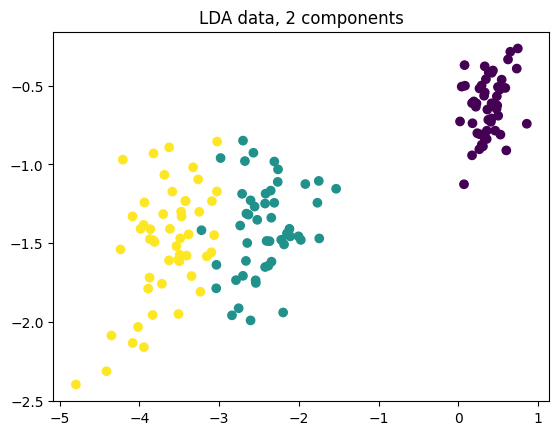

90.0% accuracy on neural network


In [14]:
from functions import LDA, evaluate, tSNE, PCA


lda_data = LDA(data, labels, 2)
plt.scatter(lda_data[:,0], lda_data[:,1],c=np.unique(labels, return_inverse=True)[1])
plt.title('LDA data, 2 components')
plt.show()


ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(lda_data, labels, test_size=0.4, shuffle=True)

clf5 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf5.fit(ex_x_train, ex_y_train)
print(f'{round(clf5.score(ex_x_test, ex_y_test), 4)*100}% accuracy on neural network')

Same thing with tSNE, plotting the results for two dimensions, and having a look at the accuracy using the same MLP classifier

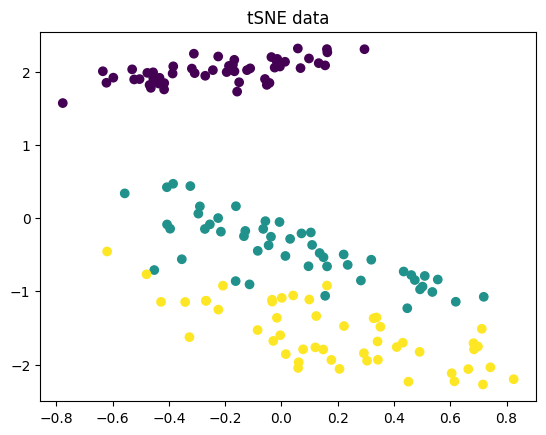

30.0% accuracy on neural network


In [15]:
tsne_data = tSNE(data, perplexity=100, epsilon=20, PCA_dims=4, output=False)
plt.scatter(tsne_data[:,0], tsne_data[:,1],c=np.unique(labels, return_inverse=True)[1])
plt.title('tSNE data')
plt.show()

ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(tsne_data, labels, test_size=0.4, shuffle=True)

clf6 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf6.fit(ex_x_train, ex_y_train)
print(f'{round(clf6.score(ex_x_test, ex_y_test), 4)*100}% accuracy on neural network')

Now we are getting serious about testing. Here we define a function to take in a dataset, and run all our dimensionality reduction techniques, then test all of those on a given model. The testing involves train and test score as well as times.

In [16]:
def runAllMethods(data, clf, train_ind, test_ind, numComp=3):

    

    resBase = evaluate(data, labels, np.array(train_ind), np.array(test_ind), clf)

    lda_data = LDA(data, labels, numComp)
    resLDA = evaluate(lda_data, labels, np.array(train_ind), np.array(test_ind), clf)

    pca_data = PCA(data)
    pca_data_3 = pca_data[:,:numComp]
    resPCA = evaluate(pca_data_3, labels, np.array(train_ind), np.array(test_ind), clf)

    tsne_data = tSNE(data, perplexity=100, epsilon=20, PCA_dims=4, output=False, no_dims = numComp)
    resTSNE = evaluate(tsne_data, labels, np.array(train_ind), np.array(test_ind), clf)
    return {'Base': resBase, 'LDA': resLDA, 'PCA': resPCA, 'TSNE': resTSNE}

Another testing support function, that utilizes the above to test every model, with every dataset, with every dimensionality reduction technique. This completes our comprehensive testing suite, and below we will congregate the results and report them with visuals.

The train/test split is re-shuffled at the start of this function, so that this function will constitute one "experiment", during which all samples are kept consistent.

In [30]:
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

#data and edf datas need to be defined before this is called
def runALL (printBool= False):
    res = {}
    train_ind, test_ind = train_test_split(range(len(data)))

    base = {}
    #base data
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    base['LR'] = runAllMethods(data=data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    base['KNN'] = runAllMethods(data=data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    base['NN'] = runAllMethods(data=data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    res['Base'] = base

    edf = {}
    #whole expanded df
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    edf['LR'] = runAllMethods(data=edf_data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=6)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    edf['KNN'] = runAllMethods(data=edf_data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=6)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    edf['NN'] = runAllMethods(data=edf_data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=6)

    res['edf'] = edf

    ro = {}
    #ratios only data
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    ro['LR'] = runAllMethods(data=edf_ro_data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    ro['KNN'] = runAllMethods(data=edf_ro_data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    ro['NN'] = runAllMethods(data=edf_ro_data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    res['ro'] = ro

    edf2 = {}
    #extended data 2
    clfLR = LogisticRegression(random_state=42, solver='liblinear')
    edf2['LR'] = runAllMethods(data=edf_2_data, clf=clfLR, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfKNN = KNeighborsClassifier(n_neighbors=3)
    edf2['KNN'] = runAllMethods(data=edf_2_data, clf=clfKNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
    edf2['NN'] = runAllMethods(data=edf_2_data, clf=clfNN, train_ind=train_ind, test_ind=test_ind, numComp=3)

    res['edf2'] = edf2

    if printBool:
        for dataset, results in res.items():
            print(f'{dataset} data set:')
            for model, results2 in results.items():
                print(f'----{model} Results:')
                for dimred, results3 in results2.items():
                    print(f'--------{dimred} Dim Reduction')
                    print(results3)
    return res

all_results = runALL(True)

Base data set:
----LR Results:
--------Base Dim Reduction
{'Train_Score': 0.9642857142857143, 'Test_Score': 1.0, 'Train_Time': 0.0008051395416259766, 'Model_Size': 56}
--------LDA Dim Reduction
{'Train_Score': 0.9553571428571429, 'Test_Score': 0.9736842105263158, 'Train_Time': 0.0007207393646240234, 'Model_Size': 56}
--------PCA Dim Reduction
{'Train_Score': 0.9642857142857143, 'Test_Score': 1.0, 'Train_Time': 0.00047707557678222656, 'Model_Size': 56}
--------TSNE Dim Reduction
{'Train_Score': 0.9375, 'Test_Score': 0.9210526315789473, 'Train_Time': 0.0010988712310791016, 'Model_Size': 56}
----KNN Results:
--------Base Dim Reduction
{'Train_Score': 0.9821428571428571, 'Test_Score': 0.9210526315789473, 'Train_Time': 0.00024700164794921875, 'Model_Size': 56}
--------LDA Dim Reduction
{'Train_Score': 0.9732142857142857, 'Test_Score': 0.9473684210526315, 'Train_Time': 0.00022482872009277344, 'Model_Size': 56}
--------PCA Dim Reduction
{'Train_Score': 0.9821428571428571, 'Test_Score': 0.9210

Now to take things a step further, we will run all of these tests ten times, to measure average accuracy, and to get a variance for each model. This will provide insights into if there is any over fitting occurring, and if there are huge variations in any particular models' performance.

In [33]:
from tqdm.auto import tqdm

# Perform 10 runs, to compute average and variance over
multiple_runs = []
for run in tqdm(range(10)):
    multiple_runs.append(runALL(False))

  0%|          | 0/10 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Now we process all the tests, and compute the averages and variances over our ten runs.

In [36]:
from copy import deepcopy

# Create copy to store all results and zero out
iterated_results = deepcopy(all_results)
for dataset, results in iterated_results.items():
    for model, results2 in results.items():
        for dimred, results3 in results2.items():
            for metric, score in results3.items():
                results3[metric] = []

# Roll all the results into a list for metric creation and graphing
for run in multiple_runs:
    for dataset, results in run.items():
        for model, results2 in results.items():
            for dimred, results3 in results2.items():
                for metric, score in results3.items():
                    iterated_results[dataset][model][dimred][metric].append(score)

# Print the iterated results
for dataset, results in iterated_results.items():
    print(f'{dataset} data set:')
    for model, results2 in results.items():
        print(f'----{model} Results:')
        for dimred, results3 in results2.items():
            print(f'--------{dimred} Dim Reduction')
            print(results3)

Base data set:
----LR Results:
--------Base Dim Reduction
{'Train_Score': [0.9732142857142857, 0.9464285714285714, 0.9464285714285714, 0.9553571428571429, 0.9732142857142857, 0.9642857142857143, 0.9464285714285714, 0.9642857142857143, 0.9464285714285714, 0.9642857142857143], 'Test_Score': [0.9736842105263158, 1.0, 0.9736842105263158, 1.0, 0.9736842105263158, 0.9736842105263158, 1.0, 0.9473684210526315, 1.0, 0.9473684210526315], 'Train_Time': [0.0011382102966308594, 0.0007002353668212891, 0.0006492137908935547, 0.0007891654968261719, 0.0006861686706542969, 0.0006611347198486328, 0.0009210109710693359, 0.0006561279296875, 0.0006399154663085938, 0.00061798095703125], 'Model_Size': [56, 56, 56, 56, 56, 56, 56, 56, 56, 56]}
--------LDA Dim Reduction
{'Train_Score': [0.9553571428571429, 0.9642857142857143, 0.9285714285714286, 0.9642857142857143, 0.9375, 0.9732142857142857, 0.9464285714285714, 0.9464285714285714, 0.9642857142857143, 0.9553571428571429], 'Test_Score': [0.9473684210526315, 0.97

# Average Score Results

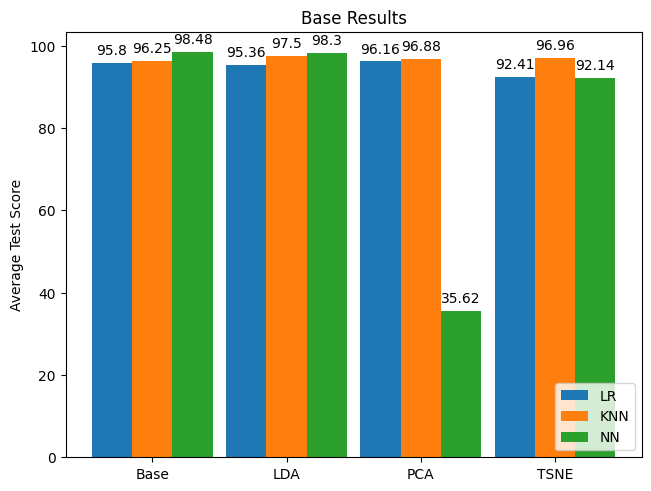

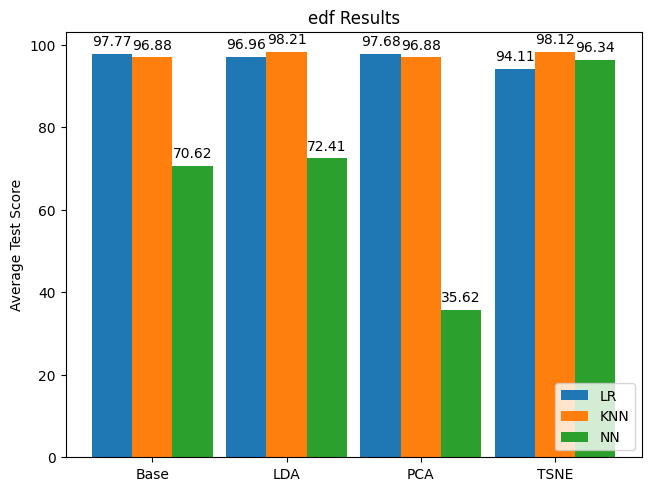

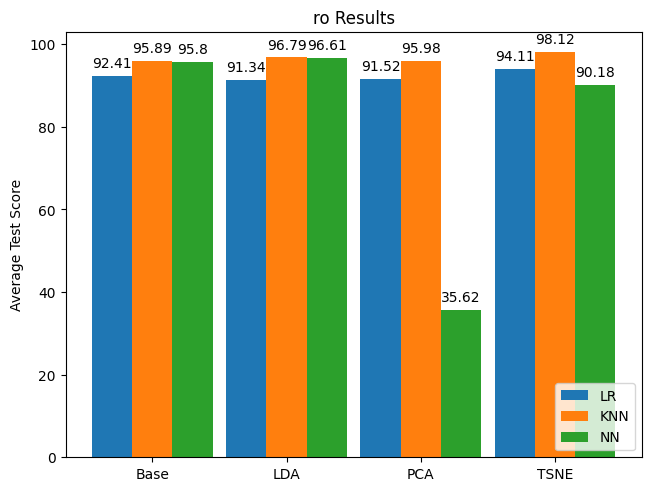

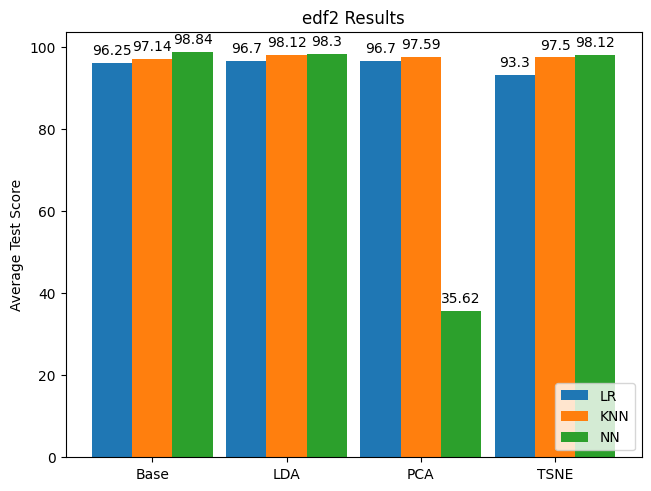

In [64]:
width = 0.3
x = np.arange(len(iterated_results['Base']['LR'].keys()))

for dataset, results in iterated_results.items():
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')

    for model, results2 in results.items():
        # for dimred, results3 in results2.items():
        offset = width*multiplier
        multiplier += 1
        rects = ax.bar(x+offset, [round(np.average(results3['Train_Score'])*100, 2) for results3 in results2.values()], width, label=model)
        ax.bar_label(rects, padding=4, label_type='edge')

    ax.set_ylabel('Average Test Score')
    ax.set_title(f'{dataset} Results')
    ax.set_xticks(x+width, [dim for dim in results2.keys()])
    ax.legend(loc='lower right')
    plt.show()


# 10 Run Variance

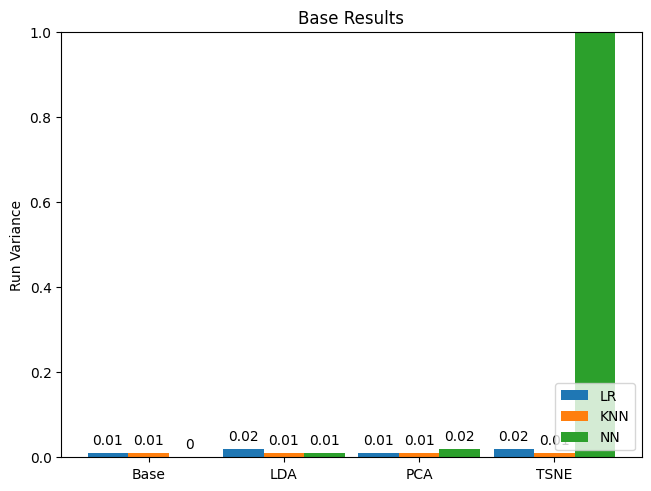

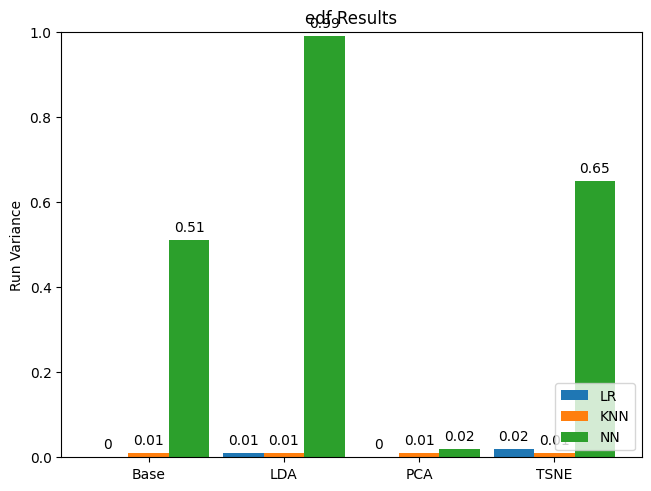

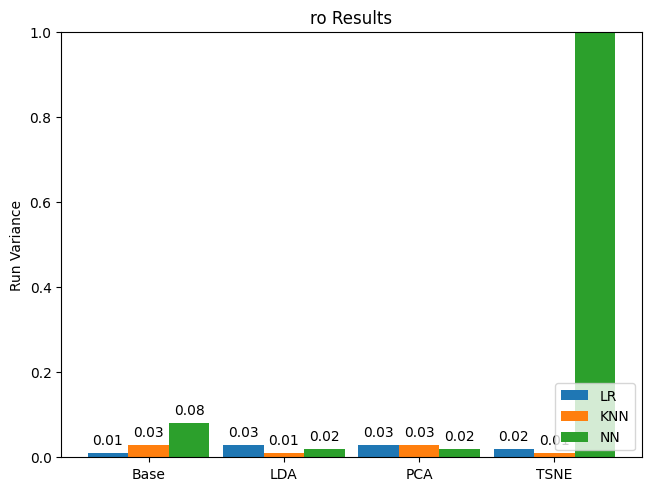

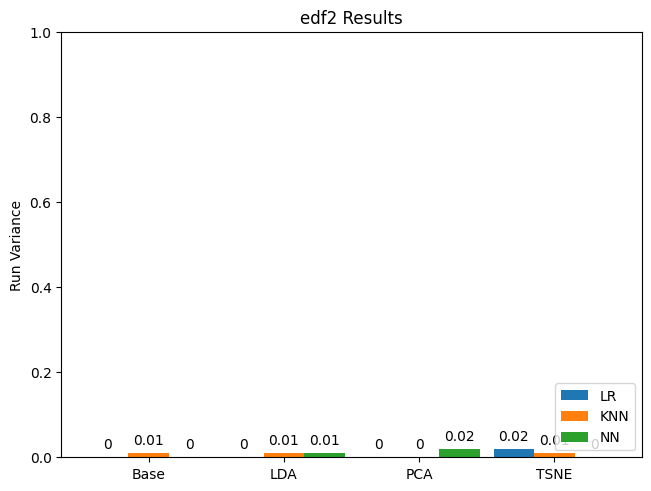

In [67]:
width = 0.3
x = np.arange(len(iterated_results['Base']['LR'].keys()))

for dataset, results in iterated_results.items():
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')

    for model, results2 in results.items():
        # for dimred, results3 in results2.items():
        offset = width*multiplier
        multiplier += 1
        rects = ax.bar(x+offset, [round(np.var(results3['Train_Score'])*100, 2) for results3 in results2.values()], width, label=model)
        ax.bar_label(rects, padding=4, label_type='edge')

    ax.set_ylabel('Run Variance')
    ax.set_title(f'{dataset} Results')
    ax.set_xticks(x+width, [dim for dim in results2.keys()])
    ax.set_ylim(0,1)
    ax.legend(loc='lower right')
    plt.show()